**EXERCICE PYTHON**  
Ce notebook a pour objectif de calculer le VWAP horaire du bitcon pour 11 exchanges différents

**PROJET REALISE PAR MAYOUSSE-AUMIPHIN Maud & DIALLO-COUANT MARIAM**

On commence par importer les libraries qu'on va utiliser lors de notre projet (pandas et glob)

In [2]:
import pandas as pd
import glob 

Importation de la libraire matplotlib afin de réaliser un graphique

In [3]:
import matplotlib.pyplot as plt

**1ère PARTIE : INPUT MANIPULATION ET CALCULS 
CHARGEMENT DES 11 FICHIERS**

In [4]:
path = 'data' 
all_exchanges = glob.glob(r'C:\Users\Mariam\OneDrive\Documents\DU_DATA\PROJET_PYTHON\data\*.csv')

all_exchanges

['C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\bfly.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\bfnx.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\bnus.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\btrx.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\cbse.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\gmni.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\itbi.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\krkn.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\lmax.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\okcn.csv',
 'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\data\\stmp.csv']

In [5]:
DF = pd.DataFrame()  # Initialisation d'un tableau vide afin d'importer les données des fichiers contenant les exchanges
Global = pd.DataFrame()  # Intilaisation d'un data vide afin de créer le data final avec l'ensemble des VWAP caluculés et le VWAP global

for filename in all_exchanges:
    # Input - 1ère partie
    df = pd.read_csv(filename) ## lecture des fichiers
    Global = pd.concat([Global, df]) ## concaténation des données
    exchange_name = filename[-8:-4]  # extraction des noms des fichiers pour renommer les colonnes des vwap calculés
    
    # Manipulation de données - 2ème partie
    df["timestamp"] = pd.to_datetime(df["timestamp"]) ## formater la colonne timestamp en date 
    df.set_index("timestamp", inplace=True) ## indexer la colonne timestamp en index
    df["price*amount"] = df["price"] * df["amount"] ## définition de la formule de calcul du VWAP
    
    # Reset index before resampling
    df.reset_index(inplace=True) ## modification de l'index pour le réinitailiser
    df = df.set_index("timestamp").resample("1H").sum() ## regroupment des index en 1 heure
    
    # Calcul de VWAP - Troisième partie
    df['vwap_' + exchange_name] = df["price*amount"] / df["amount"] ## nommage des colonnes calculées avec le nom des fichiers + vwap
    
    # Concatenate the VWAP column to the final DataFrame
    DF = pd.concat([DF, df['vwap_' + exchange_name]], axis=1) ## concaténation de la vwap global avec le nom des fichiers

# Calcul global VWAP
DF['vwap_Global'] = DF.mean(axis=1) ## calcul de la vwap global

##Sauvegarde du nouveau fichier avec les vwap calculées et la vwap global
DF.to_csv(r'C:\\Users\\Mariam\\OneDrive\\Documents\\DU_DATA\\PROJET_PYTHON\\VWAP_all_trades.csv', index=True)

DF

,vwap_bfly,vwap_bfnx,vwap_bnus,vwap_btrx,vwap_cbse,vwap_gmni,vwap_itbi,vwap_krkn,vwap_lmax,vwap_okcn,vwap_stmp,vwap_Global
2021-02-24 00:00:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
2021-02-24 01:00:00,49607.923645,49441.592938,49196.187346,49343.265805,49317.201370,49458.079101,49509.699420,49179.026877,49250.834067,49422.816196,49220.299732,49358.811500
2021-02-24 02:00:00,50196.677303,50237.005036,50200.414314,50264.128120,50248.894775,50268.259968,50260.294897,50214.502350,50227.852912,50218.786802,50283.555918,50238.215672
2021-02-24 03:00:00,50948.000000,50608.443325,50523.291435,50528.684300,50498.142558,50494.398639,50533.802903,50537.044841,50458.462794,50435.243773,50472.637817,50548.922944
2021-02-24 04:00:00,50892.806229,50889.743300,50900.796481,50914.284328,50942.646520,50934.953286,51019.753640,50917.060833,50851.638004,51023.204299,50987.941708,50934.075330
2021-02-24 05:00:00,NaN,50344.152274,50383.987434,50537.358940,50513.989242,50528.602570,50416.281591,50421.092041,50473.959563,50399.457611,50440.124897,50445.900616
2021-02-24 06:00:00,49978.511632,49713.514206,50046.486487,50033.771901,49982.465002,49935.135891,49907.747367,49916.108053,50061.808328,49940.207735,49939.781897,49950.503500
2021-02-24 07:00:00,49680.100000,49899.138736,49861.581152,50032.963471,49959.624169,50034.858944,49944.963422,49994.271641,49996.280196,50030.400520,49974.235438,49946.219790
2021-02-24 08:00:00,50144.205464,50629.718533,50559.886413,50587.218865,50541.090694,50476.882959,50600.265267,50545.216768,50552.860398,50482.659430,50594.394449,50519.490840
2021-02-24 09:00:00,50884.023714,50887.439443,50842.080628,50947.529893,50901.001611,50901.639070,51014.427564,50987.736822,50934.152165,51005.570586,50902.708746,50928.028204


**TRAITEMENT DES VALEURS MANQUANTES**

In [6]:
## remplacement des valeurs maquantes existante dans le fichier bfly
mean_vwap_bfly = DF['vwap_bfly'].mean()
DF['vwap_bfly'].fillna(mean_vwap_bfly, inplace=True) #remplacer les valeurs NaN par la moyenne de la colonne de l'exchange bfly 
# nous choisissons cette technique afin de remplacer la valeur manquante elle permet de lisser l'ensemble des données sur la période

In [7]:
DF #vérifier que les données soient bien remplacées

,vwap_bfly,vwap_bfnx,vwap_bnus,vwap_btrx,vwap_cbse,vwap_gmni,vwap_itbi,vwap_krkn,vwap_lmax,vwap_okcn,vwap_stmp,vwap_Global
2021-02-24 00:00:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
2021-02-24 01:00:00,49607.923645,49441.592938,49196.187346,49343.265805,49317.201370,49458.079101,49509.699420,49179.026877,49250.834067,49422.816196,49220.299732,49358.811500
2021-02-24 02:00:00,50196.677303,50237.005036,50200.414314,50264.128120,50248.894775,50268.259968,50260.294897,50214.502350,50227.852912,50218.786802,50283.555918,50238.215672
2021-02-24 03:00:00,50948.000000,50608.443325,50523.291435,50528.684300,50498.142558,50494.398639,50533.802903,50537.044841,50458.462794,50435.243773,50472.637817,50548.922944
2021-02-24 04:00:00,50892.806229,50889.743300,50900.796481,50914.284328,50942.646520,50934.953286,51019.753640,50917.060833,50851.638004,51023.204299,50987.941708,50934.075330
2021-02-24 05:00:00,49727.934759,50344.152274,50383.987434,50537.358940,50513.989242,50528.602570,50416.281591,50421.092041,50473.959563,50399.457611,50440.124897,50445.900616
2021-02-24 06:00:00,49978.511632,49713.514206,50046.486487,50033.771901,49982.465002,49935.135891,49907.747367,49916.108053,50061.808328,49940.207735,49939.781897,49950.503500
2021-02-24 07:00:00,49680.100000,49899.138736,49861.581152,50032.963471,49959.624169,50034.858944,49944.963422,49994.271641,49996.280196,50030.400520,49974.235438,49946.219790
2021-02-24 08:00:00,50144.205464,50629.718533,50559.886413,50587.218865,50541.090694,50476.882959,50600.265267,50545.216768,50552.860398,50482.659430,50594.394449,50519.490840
2021-02-24 09:00:00,50884.023714,50887.439443,50842.080628,50947.529893,50901.001611,50901.639070,51014.427564,50987.736822,50934.152165,51005.570586,50902.708746,50928.028204


In [8]:
DF.info() #vérification que les données sont bien des valeurs numériques de type (float)

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2021-02-24 00:00:00 to 2021-02-24 23:00:00
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vwap_bfly    24 non-null     float64
 1   vwap_bfnx    24 non-null     float64
 2   vwap_bnus    24 non-null     float64
 3   vwap_btrx    24 non-null     float64
 4   vwap_cbse    24 non-null     float64
 5   vwap_gmni    24 non-null     float64
 6   vwap_itbi    24 non-null     float64
 7   vwap_krkn    24 non-null     float64
 8   vwap_lmax    24 non-null     float64
 9   vwap_okcn    24 non-null     float64
 10  vwap_stmp    24 non-null     float64
 11  vwap_Global  24 non-null     float64
dtypes: float64(12)
memory usage: 2.4+ KB


## 2ème PARTIE : AUTRES INDICATEURS ET GRAPHIQUE ##

**PREPARATION DES DONNEES POUR LA CREATION DU GRAPHIQUE**

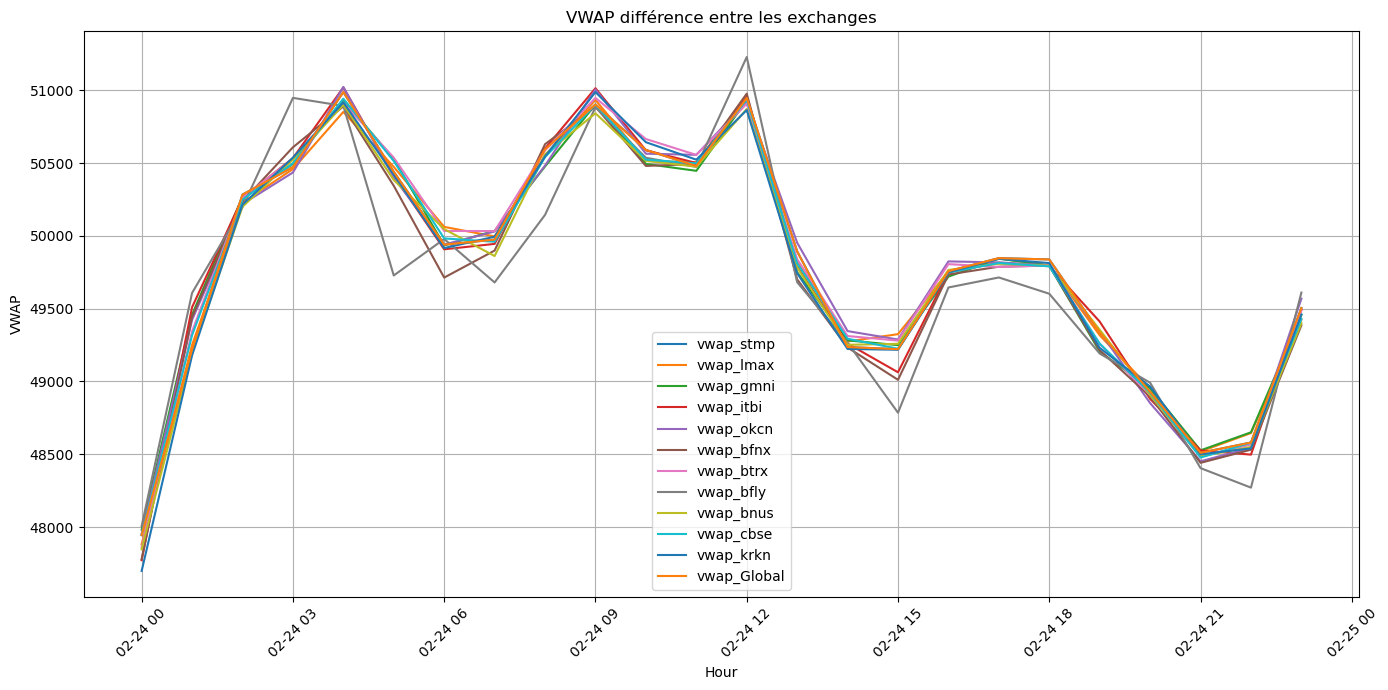

In [9]:
# Préparation des données pour la création du graphique
data = {
    'Hour': pd.date_range(start='2021-02-24 00:00:00', end='2021-02-24 23:00:00', freq='H'),
    'vwap_stmp': [47944.262770, 49220.299732, 50283.555918, 50472.637817, 50987.941708, 50440.124897, 49939.781897, 49974.235438, 50594.394449, 50902.708746, 50590.393464, 50480.338478, 50947.570599, 49893.768540, 49236.200293, 49221.752536, 49757.699345, 49847.050543, 49838.075835, 49337.141714, 48927.907365, 48509.784282, 48580.633397, 49504.553952],
    'vwap_lmax': [47880.958914, 49250.834067, 50227.852912, 50458.462794, 50851.638004, 50473.959563, 50061.808328, 49996.280196, 50552.860398, 50934.152165, 50514.769692, 50505.688077, 50918.641498, 49827.035500, 49274.408306, 49324.913761, 49755.518204, 49845.112441, 49796.547791, 49317.071732, 48952.608092, 48518.462038, 48645.530586, 49423.471087],
    'vwap_gmni': [47981.711507, 49458.079101, 50268.259968, 50494.398639, 50934.953286, 50528.602570, 49935.135891, 50034.858944, 50476.882959, 50901.639070, 50494.324252, 50446.875139, 50932.913060, 49750.219364, 49282.042100, 49249.513262, 49720.094217, 49843.673337, 49796.550879, 49204.725466, 48952.988324, 48526.697204, 48650.565402, 49457.500518],
    'vwap_itbi': [47772.255562, 49509.699420, 50260.294897, 50533.802903, 51019.753640, 50416.281591, 49907.747367, 49944.963422, 50600.265267, 51014.427564, 50588.054390, 50500.795390, 50956.067366, 49790.028432, 49260.066525, 49062.979123, 49749.262596, 49815.871953, 49791.772547, 49411.327848, 48880.346896, 48526.432824, 48497.261357, 49493.097791],
    'vwap_okcn': [47954.733900, 49422.816196, 50218.786802, 50435.243773, 51023.204299, 50399.457611, 49940.207735, 50030.400520, 50482.659430, 51005.570586, 50564.539463, 50556.759305, 50921.934715, 49953.170583, 49345.871820, 49288.106394, 49824.679690, 49817.802710, 49797.709996, 49343.114456, 48851.209268, 48451.587572, 48543.495588, 49568.860668],
    'vwap_bfnx': [47778.970482, 49441.592938, 50237.005036, 50608.443325, 50889.743300, 50344.152274, 49713.514206, 49899.138736, 50629.718533, 50887.439443, 50480.384254, 50494.052136, 50976.883072, 49701.256411, 49233.188583, 49011.131584, 49734.684912, 49788.338504, 49795.622560, 49214.864132, 48895.911947, 48440.911774, 48531.103989, 49385.749440],
    'vwap_btrx': [47861.252787, 49343.265805, 50264.128120, 50528.684300, 50914.284328, 50537.358940, 50033.771901, 50032.963471, 50587.218865, 50947.529893, 50665.392921, 50556.416640, 50907.729530, 49839.742131, 49311.928912, 49280.555708, 49805.936932, 49786.375155, 49797.741514, 49257.819346, 48907.006080, 48486.392268, 48566.458228, 49488.224862],
    'vwap_bfly': [48006.990396, 49607.923645, 50196.677303, 50948.000000, 50892.806229, 49727.934759, 49978.511632, 49680.100000, 50144.205464, 50884.023714, 50536.602041, 50474.184698, 51228.616364, 49681.734856, 49266.087850, 48785.145928, 49645.483600, 49714.249704, 49602.439024, 49191.600563, 48991.421225, 48404.532367, 48270.598647, 49610.564199],
    'vwap_bnus': [47846.763010, 49196.187346, 50200.414314, 50523.291435, 50900.796481, 50383.987434, 50046.486487, 49861.581152, 50559.886413, 50842.080628, 50515.867452, 50475.338733, 50870.863408, 49783.077635, 49251.723838, 49258.306863, 49765.878311, 49808.544722, 49795.325779, 49355.109623, 48906.476335, 48485.980606, 48549.925443, 49399.630134],
    'vwap_cbse': [47945.341624, 49317.201370, 50248.894775, 50498.142558, 50942.646520, 50513.989242, 49982.465002, 49959.624169, 50541.090694, 50901.001611, 50523.886721, 50498.455216, 50935.790979, 49811.472119, 49293.346463, 49224.856517, 49748.948299, 49813.534998, 49790.606855, 49259.860732, 48922.873467, 48476.878211, 48579.180689, 49428.972903],
    'vwap_krkn': [47698.307100, 49179.026877, 50214.502350, 50537.044841, 50917.060833, 50421.092041, 49916.108053, 49994.271641, 50545.216768, 50987.736822, 50643.536208, 50523.501578, 50864.097845, 49743.211946, 49223.085281, 49217.787308, 49749.960860, 49842.350098, 49813.098122, 49230.388097, 48964.871226, 48499.380608, 48540.346388, 49459.905292],
    'vwap_Global': [47944.262770, 49220.299732, 50283.555918, 50472.637817, 50987.941708, 50440.124897, 49939.781897, 49974.235438, 50594.394449, 50902.708746, 50590.393464, 50480.338478, 50947.570599, 49893.768540, 49236.200293, 49221.752536, 49757.699345, 49847.050543, 49838.075835, 49337.141714, 48927.907365, 48509.784282, 48580.633397, 49504.553952]
}

df = pd.DataFrame(data)
df.set_index('Hour', inplace=True)

# Préparation de la taille du graphique
plt.figure(figsize=(14, 7))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('VWAP différence entre les exchanges')
plt.xlabel('Hour')
plt.ylabel('VWAP')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Montrer le graphique
plt.show()

Voici un graphique permettant de voir les différences entre les heures concernant le VWAP, on voit que le pic du prix pour le bfly est à 12h.

Désormais il serait intéressant de voir à quel moment il est intéressant de vendre ces exchanges

In [10]:
# Calcul de la moyenne VWAP pour chaque exchange
mean_vwap_by_exchange = DF.mean()

# Identifier l'échange avec la moyenne VWAP la plus élevée
best_exchange = mean_vwap_by_exchange.idxmax()

# Filtrer sur le meilleur exchange
best_exchange_data = DF[best_exchange]

# Afficher l'heure à laquelle le vwap est le plus haut
best_hour_to_sell = best_exchange_data.idxmax()

print("Le meilleur trade est:", best_exchange)
print("La meilleure heure pour vendre est:", best_hour_to_sell)

Le meilleur trade est: vwap_okcn
La meilleure heure pour vendre est: 2021-02-24 04:00:00


**CALCUL : MOYENNE - ECART TYPES - DONNEES MAXI ET MINI**

In [11]:
# connaître les différentes particularités du dataframe avec la moyenne, l'écart type, les données maximumn et minimumn de chaque exchange
stat =DF.describe().astype(int).transpose()

In [12]:
stat 

,count,mean,std,min,25%,50%,75%,max
vwap_bfly,24,49727,857,48006,49247,49680,50266,51228
vwap_bfnx,24,49754,845,47778,49228,49761,50483,50976
vwap_bnus,24,49774,815,47846,49256,49801,50485,50900
vwap_btrx,24,49821,834,47861,49304,49822,50542,50947
vwap_cbse,24,49798,816,47945,49284,49812,50502,50942
vwap_gmni,24,49805,796,47981,49273,49820,50481,50934
vwap_itbi,24,49804,851,47772,49373,49803,50509,51019
vwap_krkn,24,49780,850,47698,49221,49827,50526,50987
vwap_lmax,24,49804,806,47880,49306,49836,50481,50934
vwap_okcn,24,49822,819,47954,49345,49882,50447,51023


## CALCUL DU Open High Low Close (OHLC) ##

Calculons désormais le OHLC OHLC = Open, High, Low et Close (ouverture, sommet, creux et clôture) ces données permettent d'interpréter les mouvements de prix durant les différentes heures de trade. L'important dans les trades reste tout de même la valeur de fermeture, cette valeur est la valeur de l'échange définitive.

In [13]:
# Affichage des données open, high, low, close, cette fonction exclut les valeurs manquantesmais ici nous n'en avons pas.
ohlc_df = df.resample('1H').agg({'vwap_bfly': 'ohlc'})

# Afficher le dataframe avec OHLC
print(ohlc_df)

                        vwap_bfly                                          
                             open          high           low         close
Hour                                                                       
2021-02-24 00:00:00  48006.990396  48006.990396  48006.990396  48006.990396
2021-02-24 01:00:00  49607.923645  49607.923645  49607.923645  49607.923645
2021-02-24 02:00:00  50196.677303  50196.677303  50196.677303  50196.677303
2021-02-24 03:00:00  50948.000000  50948.000000  50948.000000  50948.000000
2021-02-24 04:00:00  50892.806229  50892.806229  50892.806229  50892.806229
2021-02-24 05:00:00  49727.934759  49727.934759  49727.934759  49727.934759
2021-02-24 06:00:00  49978.511632  49978.511632  49978.511632  49978.511632
2021-02-24 07:00:00  49680.100000  49680.100000  49680.100000  49680.100000
2021-02-24 08:00:00  50144.205464  50144.205464  50144.205464  50144.205464
2021-02-24 09:00:00  50884.023714  50884.023714  50884.023714  50884.023714
2021-02-24 1

## CALCUL DES VWAP A INTERVALLE DE 5 MINUTES ##

In [14]:
# Convertir l'index en datetime
DF.index = pd.to_datetime(DF.index)

# Fréquence de calcul de données toutes les 5 minutes
DF_resampled_5minutes = DF.resample('5T').mean()

# Fill NaN values with previous values
df_filled1 = DF_resampled_5minutes.ffill()

# Afficher le dataframe par fréquence de 5 minutes
print(DF_resampled_5minutes)

                        vwap_bfly     vwap_bfnx     vwap_bnus     vwap_btrx  \
2021-02-24 00:00:00  48006.990396  47778.970482  47846.763010  47861.252787   
2021-02-24 00:05:00           NaN           NaN           NaN           NaN   
2021-02-24 00:10:00           NaN           NaN           NaN           NaN   
2021-02-24 00:15:00           NaN           NaN           NaN           NaN   
2021-02-24 00:20:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2021-02-24 22:40:00           NaN           NaN           NaN           NaN   
2021-02-24 22:45:00           NaN           NaN           NaN           NaN   
2021-02-24 22:50:00           NaN           NaN           NaN           NaN   
2021-02-24 22:55:00           NaN           NaN           NaN           NaN   
2021-02-24 23:00:00  49610.564199  49385.749440  49399.630134  49488.224862   

                        vwap_cbse     vwap_gmni    

In [15]:
 df_filled1 #remplacer par la valeur du dessous afin d'éviter les valeurs à 0 et une courbe qui est disparate

,vwap_bfly,vwap_bfnx,vwap_bnus,vwap_btrx,vwap_cbse,vwap_gmni,vwap_itbi,vwap_krkn,vwap_lmax,vwap_okcn,vwap_stmp,vwap_Global
2021-02-24 00:00:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
2021-02-24 00:05:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
2021-02-24 00:10:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
2021-02-24 00:15:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
2021-02-24 00:20:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-24 22:40:00,48270.598647,48531.103989,48549.925443,48566.458228,48579.180689,48650.565402,48497.261357,48540.346388,48645.530586,48543.495588,48580.633397,48541.372701
2021-02-24 22:45:00,48270.598647,48531.103989,48549.925443,48566.458228,48579.180689,48650.565402,48497.261357,48540.346388,48645.530586,48543.495588,48580.633397,48541.372701
2021-02-24 22:50:00,48270.598647,48531.103989,48549.925443,48566.458228,48579.180689,48650.565402,48497.261357,48540.346388,48645.530586,48543.495588,48580.633397,48541.372701
2021-02-24 22:55:00,48270.598647,48531.103989,48549.925443,48566.458228,48579.180689,48650.565402,48497.261357,48540.346388,48645.530586,48543.495588,48580.633397,48541.372701


## CALCUL DES VWAP A INTERVALLE DE 30 MINUTES ##

In [16]:
# Convertir l'index en datetime
DF.index = pd.to_datetime(DF.index)

# Fréquence de calcul de données toutes les 30 minutes
DF_resampled_30minutes = DF.resample('30T').mean()

# Remplir les Nan avec les valeurs du dessus
df_filled2 = DF_resampled_30minutes.ffill()

# Afficher le dataframe par fréquence de 30 minutes
print(DF_resampled_30minutes)

                        vwap_bfly     vwap_bfnx     vwap_bnus     vwap_btrx  \
2021-02-24 00:00:00  48006.990396  47778.970482  47846.763010  47861.252787   
2021-02-24 00:30:00           NaN           NaN           NaN           NaN   
2021-02-24 01:00:00  49607.923645  49441.592938  49196.187346  49343.265805   
2021-02-24 01:30:00           NaN           NaN           NaN           NaN   
2021-02-24 02:00:00  50196.677303  50237.005036  50200.414314  50264.128120   
2021-02-24 02:30:00           NaN           NaN           NaN           NaN   
2021-02-24 03:00:00  50948.000000  50608.443325  50523.291435  50528.684300   
2021-02-24 03:30:00           NaN           NaN           NaN           NaN   
2021-02-24 04:00:00  50892.806229  50889.743300  50900.796481  50914.284328   
2021-02-24 04:30:00           NaN           NaN           NaN           NaN   
2021-02-24 05:00:00  49727.934759  50344.152274  50383.987434  50537.358940   
2021-02-24 05:30:00           NaN           NaN     

In [17]:
df_filled2 #remplacement par la valeur du dessous afin d'éviter les valeurs à 0 et une courbe avec une rupture

,vwap_bfly,vwap_bfnx,vwap_bnus,vwap_btrx,vwap_cbse,vwap_gmni,vwap_itbi,vwap_krkn,vwap_lmax,vwap_okcn,vwap_stmp,vwap_Global
2021-02-24 00:00:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
2021-02-24 00:30:00,48006.990396,47778.970482,47846.763010,47861.252787,47945.341624,47981.711507,47772.255562,47698.307100,47880.958914,47954.733900,47944.262770,47879.231641
2021-02-24 01:00:00,49607.923645,49441.592938,49196.187346,49343.265805,49317.201370,49458.079101,49509.699420,49179.026877,49250.834067,49422.816196,49220.299732,49358.811500
2021-02-24 01:30:00,49607.923645,49441.592938,49196.187346,49343.265805,49317.201370,49458.079101,49509.699420,49179.026877,49250.834067,49422.816196,49220.299732,49358.811500
2021-02-24 02:00:00,50196.677303,50237.005036,50200.414314,50264.128120,50248.894775,50268.259968,50260.294897,50214.502350,50227.852912,50218.786802,50283.555918,50238.215672
2021-02-24 02:30:00,50196.677303,50237.005036,50200.414314,50264.128120,50248.894775,50268.259968,50260.294897,50214.502350,50227.852912,50218.786802,50283.555918,50238.215672
2021-02-24 03:00:00,50948.000000,50608.443325,50523.291435,50528.684300,50498.142558,50494.398639,50533.802903,50537.044841,50458.462794,50435.243773,50472.637817,50548.922944
2021-02-24 03:30:00,50948.000000,50608.443325,50523.291435,50528.684300,50498.142558,50494.398639,50533.802903,50537.044841,50458.462794,50435.243773,50472.637817,50548.922944
2021-02-24 04:00:00,50892.806229,50889.743300,50900.796481,50914.284328,50942.646520,50934.953286,51019.753640,50917.060833,50851.638004,51023.204299,50987.941708,50934.075330
2021-02-24 04:30:00,50892.806229,50889.743300,50900.796481,50914.284328,50942.646520,50934.953286,51019.753640,50917.060833,50851.638004,51023.204299,50987.941708,50934.075330


### Conclusion

Selon nos analyses, la meilleure heure pour vendre est 4h et le trade dont la moyenne vwap est la plus élevée est vwap_okcn.